In [1]:
# Expense Tracker with Category Prediction

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Step 2: Load dataset
data = pd.read_csv("C:/Users/yubik/smart-expense-tracker/smart-expense-tracker/data/expenses.csv")
print("\nSample Data:")
print(data.head())




Sample Data:
         Date  Amount       Category       Description
0  2024-07-01     500           Food     Lunch at cafe
1  2024-07-02    1200      Transport          Cab ride
2  2024-07-03    2500       Shopping         Groceries
3  2024-07-04     300  Entertainment           Netflix
4  2024-07-05    1500          Bills  Electricity bill


In [3]:
# Step 3: Manually add categories
data["Category"] = [
    "Food", "Travel", "Utilities", "Groceries", "Entertainment",
    "Travel", "Health", "Food", "Shopping", "Bills"
]

In [4]:
# Step 4: Vectorize description
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Description'])
y = data['Category']



In [5]:
# Step 5: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Step 6: Train model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [7]:
# Step 7: Evaluate
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

        Food       0.00      0.00      0.00       0.0
    Shopping       0.00      0.00      0.00       1.0
      Travel       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [8]:
# Step 8: Predict new example
def predict_category(desc):
    vect = vectorizer.transform([desc])
    return model.predict(vect)[0]

print("\nPrediction for 'Swiggy Lunch':", predict_category("Swiggy Lunch"))


Prediction for 'Swiggy Lunch': Food


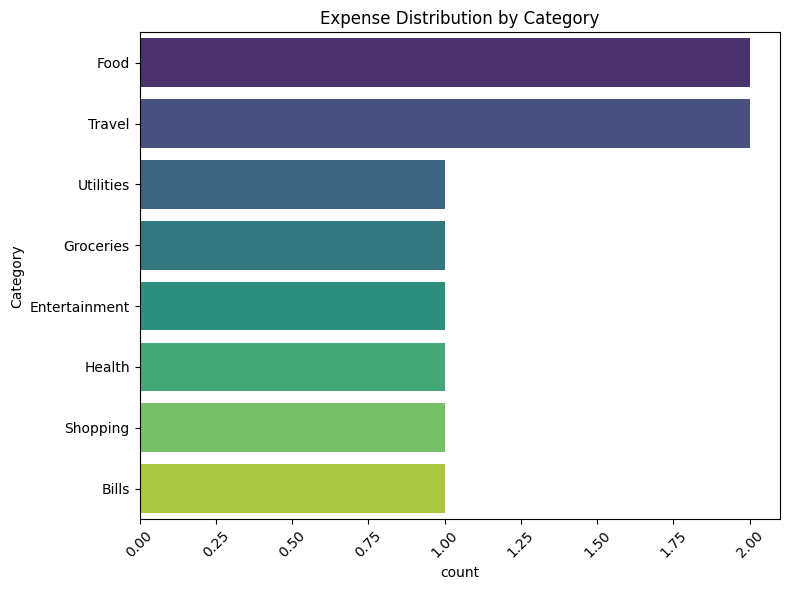

In [9]:
# Step 9: Visualize
plt.figure(figsize=(8,6))
sns.countplot(data['Category'], palette='viridis')
plt.title("Expense Distribution by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
